# CV Project 3 - Image Colourization on pets dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Prepared by:
 - Marianna Myszkowska 156041
 - Jakub Liszyński 156060

## Data set
The Oxford-IIIT Pet Dataset is a comprehensive collection of images featuring 37 distinct pet breeds, including both cats and dogs, with approximately 200 images per breed. The dataset offers significant diversity in terms of scale, pose, and lighting conditions, making it valuable for various computer vision tasks.

### Key Features:
- **Breed Annotations:** Each image is labeled with its respective breed, facilitating classification tasks.
- **Head Region of Interest (ROI):** Annotations include bounding boxes around the pet's head, aiding in localization studies.
- **Pixel-Level Trimap Segmentation:** Detailed annotations provide pixel-wise segmentation, distinguishing between the pet, foreground, and background, which is particularly useful for segmentation tasks.

## Sample Images:
Here are a few examples from the dataset:


![card](raport_sources\dataset-card.png)


In order to use this dataset for our project we wil first convert images to grayscale and only then we wil use them. The Original images will be used as a reference while coloring the images.

![colored](raport_sources\Abyssinian_1.jpg)
![gray](raport_sources\Abyssinian_1_gray.jpg)



In [ ]:
import os
from PIL import Image
def convert_images_to_grayscale(input_folder, output_folder):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
    if not os.listdir(input_folder):
        raise ValueError('Input folder is empty. Please ensure it contains images.')
    for filename in os.listdir(input_folder):
        if filename.endswith(('.png', '.jpg', '.jpeg')):
            img_path = os.path.join(input_folder, filename)
            img = Image.open(img_path).convert('L')
            gray_img_path = os.path.join(output_folder, f"{os.path.splitext(filename)[0]}_gray{os.path.splitext(filename)[1]}")
            img.save(gray_img_path)
            print(f"Converted {filename} to grayscale and saved as {gray_img_path}")



For more information and to access the dataset, please visit the [official website](https://www.robots.ox.ac.uk/~vgg/data/pets/).

## The problem - Image colorization
Image colorization is the process of adding plausible color information to grayscale images or videos. This task is inherently challenging due to its ill-posed nature; a single grayscale image can correspond to multiple valid color interpretations. Consequently, the model must infer and predict realistic colors for each pixel, often relying on learned patterns and contextual cues.

Traditionally, colorization was performed manually by artists, which was time-consuming and required significant expertise. With advancements in deep learning, automated approaches have been developed to tackle this problem. These methods typically involve training convolutional neural networks (CNNs) on large datasets of color images. During training, the models learn to map grayscale inputs to their corresponding color outputs, capturing semantic and contextual information to produce realistic colorizations.

Despite these advancements, challenges remain. The ambiguity of the task means that multiple color outputs can be correct for a single grayscale input. For instance, a grayscale image of a car could be red, blue, or any other color, and all would be plausible. Addressing this uncertainty is a key focus in current research, with approaches exploring probabilistic models and user-guided colorization to refine results.

In summary, image colorization is a complex and underdetermined problem that seeks to enrich grayscale images by predicting and applying appropriate colors, leveraging machine learning techniques to achieve this goal.

## Used architectures

## 1. architecture 1 using tensor flow

The architecture used for the image colorization task is a Convolutional Neural Network (CNN) designed to map grayscale images to their corresponding color images. The model consists of several layers, each with a specific function:

1. **Input Layer:**
   - **Shape:** (256, 256, 1)
   - **Description:** This layer accepts grayscale images of size 256x256 pixels with a single channel.

2. **Convolutional Layer 1:**
   - **Filters:** 64
   - **Kernel Size:** (3, 3)
   - **Activation:** ReLU
   - **Padding:** Same
   - **Description:** This layer applies 64 convolutional filters to the input image, each of size 3x3, and uses the ReLU activation function to introduce non-linearity. The 'same' padding ensures that the output has the same spatial dimensions as the input.

3. **UpSampling Layer 1:**
   - **Size:** (2, 2)
   - **Description:** This layer upsamples the input by a factor of 2, effectively doubling the spatial dimensions of the feature maps.

4. **Convolutional Layer 2:**
   - **Filters:** 32
   - **Kernel Size:** (3, 3)
   - **Activation:** ReLU
   - **Padding:** Same
   - **Description:** Similar to the first convolutional layer, but with 32 filters.

5. **UpSampling Layer 2:**
   - **Size:** (2, 2)
   - **Description:** This layer upsamples the input by a factor of 2 again.

6. **Convolutional Layer 3:**
   - **Filters:** 16
   - **Kernel Size:** (3, 3)
   - **Activation:** ReLU
   - **Padding:** Same
   - **Description:** Similar to the previous convolutional layers, but with 16 filters.

7. **Output Convolutional Layer:**
   - **Filters:** 3
   - **Kernel Size:** (3, 3)
   - **Activation:** Sigmoid
   - **Padding:** Same
   - **Description:** This layer produces the final output with 3 channels (representing the RGB color channels) and uses the sigmoid activation function to ensure the output values are between 0 and 1.

### Model Diagram
Below is a diagram representing the architecture of the model:

```
Input (256, 256, 1)
    ↓
Conv2D (64 filters, 3x3, ReLU, same padding)
    ↓
UpSampling2D (2x2)
    ↓
Conv2D (32 filters, 3x3, ReLU, same padding)
    ↓
UpSampling2D (2x2)
    ↓
Conv2D (16 filters, 3x3, ReLU, same padding)
    ↓
Conv2D (3 filters, 3x3, Sigmoid, same padding)
    ↓
Output (256, 256, 3)
```
![model](raport_sources\tensorflow.png)

## 2. Pytorch approach architecture 2
One approach involved designing a neural network with an encoder-decoder structure to predict colors from grayscale inputs. A dataset of paired grayscale and color images was prepared, and the model was tested briefly using mixed-precision training. However, this specific approach was abandoned after initial trials, due to extremly slow learning, even tho it was trained using GPU, thats why we never finished learning process and abandon this at very start.

````PYTHON
# Dataset class
class ColorizationNet(nn.Module):
    def __init__(self):
        super(ColorizationNet, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 64, kernel_size=3, padding=1),  # Input: 1x256x256
            nn.ReLU(),
            nn.Conv2d(64, 128, kernel_size=3, stride=2, padding=1),  # Downsample: 128x128x128
            nn.ReLU(),
            nn.Conv2d(128, 256, kernel_size=3, stride=2, padding=1),  # Downsample: 256x64x64
            nn.ReLU()
        )
        self.middle = nn.Sequential(
            nn.Conv2d(256, 512, kernel_size=3, padding=1),  # Bottleneck
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(512, 256, kernel_size=3, stride=2, padding=1, output_padding=1),  # Upsample: 256x128x128
            nn.ReLU(),
            nn.ConvTranspose2d(256, 128, kernel_size=3, stride=2, padding=1, output_padding=1),  # Upsample: 128x256x256
            nn.ReLU(),
            nn.Conv2d(128, 64, kernel_size=3, padding=1),  
            nn.ReLU(),
            nn.Conv2d(64, 3, kernel_size=3, padding=1),  # Output: 3x256x256
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.middle(x)
        x = self.decoder(x)
        return x
````

## 3. Architecture 3 using tensor flow

1. Input Layer:
    - Shape: (256, 256, 1)
    - Description: This layer accepts grayscale images of size 256x256 pixels with a single channel.

2. Convolutional Layer 1:
  - Filters: 64
  - Kernel Size: (3, 3)
  - Stride: 2
  - Activation: ReLU
  - Padding: Same
  - Description: This layer applies 64 convolutional filters of size 3x3 to the input image. The stride of 2 reduces the spatial dimensions by half. The ReLU activation introduces non-linearity, and 'same' padding ensures the output retains important edge features.

3. Batch Normalization 1:
    - Description: This layer normalizes the feature maps to stabilize training and improve convergence.

4. Convolutional Layer 2:
  - Filters: 128
  - Kernel Size: (3, 3)
  - Stride: 2
  - Activation: ReLU
  - Padding: Same
  - Description: This layer further processes the feature maps, using 128 filters of size 3x3. The stride of 2 reduces spatial dimensions again, and ReLU introduces non-linearity.

5. Batch Normalization 2:

    - Description: This layer normalizes the feature maps from the previous layer for better training performance.

6. UpSampling Layer 1:
    - Size: (2, 2)
    - Description: This layer upsamples the feature maps by a factor of 2, doubling the spatial dimensions.

7. Convolutional Layer 3:

    - Filters: 64
    - Kernel Size: (3, 3)
    - Activation: ReLU
    - Padding: Same
    - Description: After upsampling, this layer applies 64 convolutional filters of size 3x3 to refine the upsampled feature maps.

8. Batch Normalization 3:

    - Description: This layer normalizes the feature maps from the previous convolutional layer.

9. UpSampling Layer 2:

    - Size: (2, 2)
    - Description: This layer upsamples the feature maps by a factor of 2 again, restoring the spatial dimensions to the original size of the input.

10. Output Convolutional Layer:

    - Filters: 3
    - Kernel Size: (3, 3)
    - Activation: Sigmoid
    - Padding: Same
    - Description: The final layer applies 3 filters of size 3x3 to generate the output image. The sigmoid activation function ensures the output pixel values are between 0 and 1, representing the RGB color channels.

### Model diagram

    Input (256, 256, 1)
        ↓
    Conv2D (64 filters, 3x3, ReLU, same padding)
        ↓
    UpSampling2D (2x2)
        ↓
    Conv2D (32 filters, 3x3, ReLU, same padding)
        ↓
    UpSampling2D (2x2)
        ↓
    Conv2D (16 filters, 3x3, ReLU, same padding)
        ↓
    Conv2D (3 filters, 3x3, Sigmoid, same padding)
        ↓
    Output (256, 256, 3)


## Model Analysis

###  Number of Parameters
- **Total parameters**: **77,064**
- **Trainable parameters**: **38,403**
- **Non-trainable parameters**: **256**

###  Size in Memory
362 kb


## Training
description of the training and the required commands to run it
To train the model, ensure you have TensorFlow installed and execute the script:
architectures\arch3.ipynb

## Evaluation

#### Model was build using three different loss functions:     
1. MSE Loss (Blue)
    - Training and validation loss are very close to zero, indicating the model is performing well in terms of minimizing pixel-wise squared errors.
    - The training and validation curves overlap significantly, suggesting low overfitting and a good generalization to the validation set.

2. MAE Loss (Red)
    - The training and validation losses are slightly higher compared to MSE, as MAE minimizes absolute errors rather than squared errors. This behavior is expected since MAE is less sensitive to outliers but less aggressive in penalizing large errors.
    - The validation loss closely follows the training loss, indicating reasonable generalization.

3. Binary Crossentropy Loss (Green)
    - Both training and validation losses are significantly higher compared to MSE and MAE. This suggests that binary crossentropy might not be the ideal loss function for this task, as it is designed for binary classification or probabilistic outputs rather than pixel-wise continuous values.
    - The fluctuation in the loss suggests potential instability or difficulty in optimization.

#### Performance Summary:

  - Best Model: The model trained with MSE shows the best performance due to its low and stable losses, suitable for a pixel-wise regression task like colorization.
  - Decent Alternative: The MAE model also performs well, especially if the task requires robustness to outliers.
  - Less Suitable: The binary crossentropy model struggles with this task due to its inappropriate loss function for continuous regression-like outputs.

#### Conclusion:

For the task of image colorization, the Mean Squared Error loss is the most effective, as it ensures the smoothest and most precise results. Mean Absolute Error is a reasonable alternative if resilience to outliers is required, but binary crossentropy should be avoided for this task.

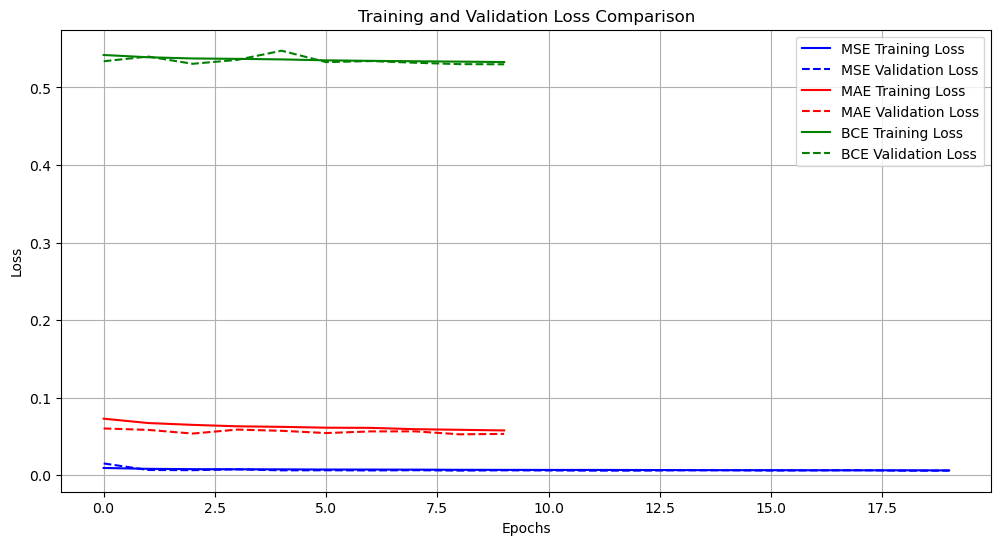

## Hyperparameters
### Optimizers
#### 1.Adam Optimizer:

-Combines the benefits of Adaptive Gradient Algorithm (AdaGrad) and Root Mean Square Propagation (RMSprop).
-Adjusts the learning rate individually for each parameter, making it highly effective and widely used.
-Suitable for models with sparse gradients or when fine-tuning, often leading to fast convergence.
-Tested with a learning rate of 0.001, showing stable training behavior.
![OPTIMIZER PLOT](raport_sources\adam.png)

#### 2.SGD (Stochastic Gradient Descent):

-A classic optimizer that updates weights based on the gradient of the loss function.
-Momentum was added (0.9) to help accelerate convergence and overcome local minima.
-Generally slower compared to adaptive optimizers but can yield better generalization with proper tuning.
-Learning rate set to 0.001; its simplicity makes it sensitive to such settings.
![OPTIMIZER PLOT](raport_sources\sgd.png)


#### 3.RMSprop:

-A popular adaptive learning rate optimizer, especially for recurrent neural networks (RNNs).
-Divides the learning rate by an exponentially decaying average of squared gradients, which helps balance learning -across parameters.
-Works well in scenarios with non-stationary objectives or noisy gradients.
-Like Adam, it was tested with a learning rate of 0.001 and proved effective in smoothing the optimization process.
![OPTIMIZER PLOT](raport_sources\rms.png)




Each optimizer was tested over 3 epochs on the same model and dataset with reduced steps for quicker evaluation. Validation loss was tracked to compare performance. Results showed the nuances of each optimizer, highlighting their strengths and trade-offs.





![OPTIMIZER PLOT](raport_sources\OPTIMIZER.png)






the original image:


![OPTIMIZER PLOT](raport_sources\Abyssinian_2.jpg)


## Models
over all we created 16 diffrent models.  they varied in architecture, optimizers used, loss functions , number of epochs and batch sizes.

### testing models
"small" models are ones created for hyperparameter and architecture testing in order to determind which approach we should use

#### architecture 1

![arch1](raport_sources\arch1_adam_mse_small.h5_colorization.png)


![arch1](raport_sources\arch1_rms_mse_small.h5_colorization.png)


![arch1](raport_sources\arch1_sgd_mse_small.h5_colorization.png)

as we can se the color is almost solid, and we cant even see the cat.

#### architecture 3

![arch3](raport_sources\arch3_adam_mse_small.h5_colorization.png)


![arch3](raport_sources\arch3_rms_mse_small.h5_colorization.png)


![arch3](raport_sources\arch3_sgd_mse_small.h5_colorization.png)

as we can see the architecture did much better even on small amount of epochs.


### bigger models
 on models tested with larger amount of epochs the diffrence is huge.

#### architecture 1


![arch1](raport_sources\arch1_adam_mse_full.h5_colorization.png)

#### architecture 3


![arch3](raport_sources\arch3_adam_mse_full.h5_colorization.png)

At this point we decided to implement Architecture 3 using RMSprop optimizer and MSE loss function.

![arch3](raport_sources\great_pyrenees_12_colorization_comparison.png)



![arch3](raport_sources\samoyed_14_colorization_comparison.png)

![arch3](raport_sources\great_pyrenees_58_colorization_comparison.png)



## Libraries
tensorflow==2.13.0

keras==2.13.0

numpy==1.23.5

matplotlib==3.7.1

scikit-learn==1.1.2

Pillow==9.3.0

h5py==3.8.0



## Rutime enviroment
The script requires the following runtime environment:
- Python 3.7+
- TensorFlow 2.x
- NumPy
- Keras (integrated with TensorFlow)
- PIL (for image processing)
- Jupyter Notebook (for running in an interactive environment)

## training and inference time
- **Training Time**: The training process depends on the hardware setup. On a typical GPU (e.g., NVIDIA RTX 3080), training for 20 epochs with a batch size of 16 may take approximately **10-20 minutes**. On our machine training the model took about 10 minutes. - **Inference Time**: Generating a colorized image from a grayscale input using the trained model typically takes **a few milliseconds** on a GPU and slightly longer on a CPU.

## Bibliography

- https://medium.com/@geokam/building-an-image-colorization-neural-network-part-4-implementation-7e8bb74616c
- https://github.com/gkamtzir/cnn-image-colorization/tree/main
- https://viso.ai/computer-vision/image-data-augmentation-for-computer-vision/

## Points
| **Task**                                         | **Status**      | **Points** |
|--------------------------------------------------|-----------------|------------|
| **Problem: Colorization**                        |  In progress    | 1          |
| **Model: Pre-trained model (different problem)** |  Completed      | 1          |
| **Data Augmentation**                            |  Completed      | 1          |
| **Cross-Validation**                             |  In progress    | 1          |
| **Testing Optimizers (at least 3)**              |  Completed      | 1          |
| **Testing Loss Functions (at least 3)**          |  Completed      | 1          |
| **Dataset Requirements (at least 1000 images)**  |  Completed      | 0 (default requirement) |
| **Metrics (at least 2)**                         |  Not Attempted  | 0 (default requirement) |
| **Report (descriptions, diagrams, etc.)**        |  In progress    | 0          |
| **Visualization Tools (e.g., TensorBoard)**      |  Not Attempted  | 1          |

### **Points Summary**
- **Problem**: 1
- **Model**: 1
- **Additional Points (Training, Dataset, Tools)**: 5
- **Total Points**: **7**




[Link to Git](https://github.com/Strajkerr/CV_Image_Colourization)